In [65]:
# Lasciate questa cella così ogni volta che aggiornate un file python, 
# anche gli import nel notebook vengono aggiornati

%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


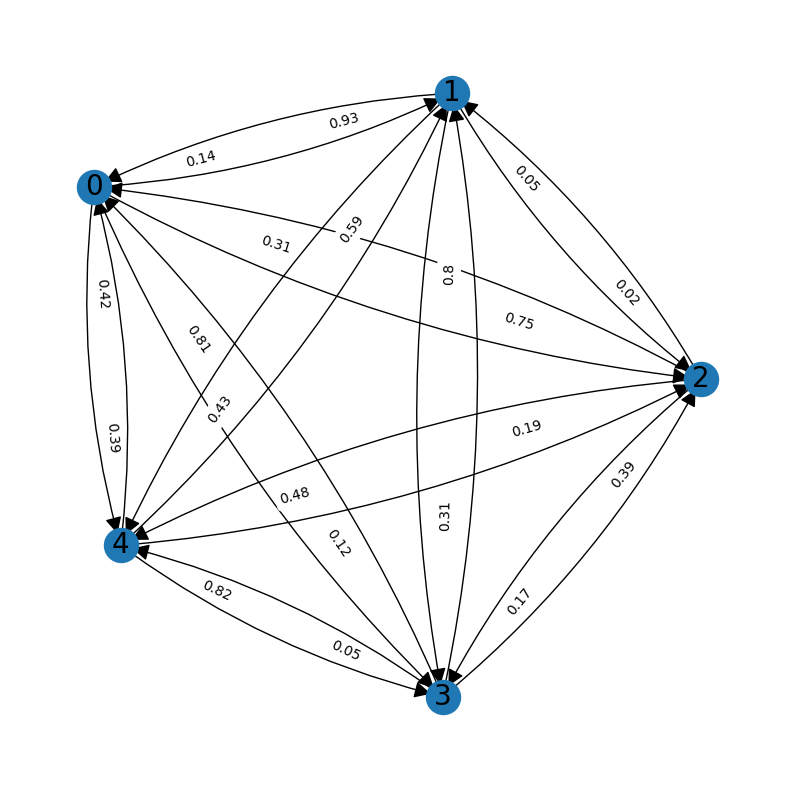

In [66]:
from Simulation import *

from Environment import *


click_probabilities = generate_click_probabilities(fully_connected=True)
observations_probabilities = generate_observation_probabilities(click_probabilities=click_probabilities)

concentration_params = [100] + [70] * NUM_OF_PRODUCTS
alpha_users = np.random.dirichlet( alpha= concentration_params, size = 1)


product_prices, users_reservation_prices = generate_prices(product_range=100, users_range=100)
tot_num_users = np.random.normal(loc=1000, scale=50)


env = Environment(users_reservation_prices = users_reservation_prices,
                    click_probabilities = click_probabilities,
                    observations_probabilities = observations_probabilities,
                    tot_num_users = tot_num_users)

Network.print_graph(G=env.network.G)

In [67]:
nodes_activation_probabilities = env.get_nodes_activation_probabilities(product_prices=product_prices)

k: 100%|██████████| 4688/4688 [00:01<00:00, 2358.13it/s]


In [68]:
B_cap = 100
budgets = np.linspace(start = 0, stop = B_cap, num= 11, endpoint=True)

In [73]:
from Ecommerce3 import *

In [74]:
ecomm3_ts = Ecommerce3_TS(B_cap = B_cap, budgets = budgets, product_prices = product_prices, tot_num_users = tot_num_users)
ecomm3_ucb = Ecommerce3_UCB(B_cap = B_cap, budgets = budgets, product_prices = product_prices, tot_num_users = tot_num_users)

In [75]:
from Ecommerce3 import *
for _ in range(100):
    print('------Thompson Sampling--------')
    arms_values = ecomm3_ts.pull_arm(nodes_activation_probabilities)
    print(arms_values)
    reward = env.round_step3(pulled_arm=arms_values)
    print(reward)
    ecomm3_ts.update(pulled_arm = arms_values, reward = reward)

    print('------UCB--------')
    arms_values = ecomm3_ucb.pull_arm(nodes_activation_probabilities=nodes_activation_probabilities)
    print(arms_values)
    reward = env.round_step3(pulled_arm=arms_values)
    print(reward)
    ecomm3_ucb.update(pulled_arm = arms_values, reward = reward)

------Thompson Sampling--------
[30. 20.  0. 30. 10.]
[3.30638542e-001 1.96493464e-001 1.21673891e-312 2.50958218e-001
 7.54003573e-002]
------UCB--------
[0. 0. 0. 0. 0.]
[0.         0.66666667 0.         0.         0.        ]
------Thompson Sampling--------
[0. 0. 0. 0. 0.]
[3.33333334e-01 7.59983632e-72 3.33333333e-01 3.70074342e-17
 3.33333333e-01]
------UCB--------
[0. 0. 0. 0. 0.]
[3.33333333e-001 3.33333333e-001 3.33333333e-001 1.28745238e-246
 7.44959650e-014]
------Thompson Sampling--------
[0. 0. 0. 0. 0.]
[0.00000000e+00 0.00000000e+00 0.00000000e+00 7.71987191e-77
 6.66666667e-01]
------UCB--------
[10.  0.  0.  0.  0.]
[8.48288949e-001 7.07512280e-048 4.81889311e-109 7.26426641e-025
 1.29375913e-094]
------Thompson Sampling--------
[0. 0. 0. 0. 0.]
[5.83786301e-109 0.00000000e+000 3.33333333e-001 0.00000000e+000
 0.00000000e+000]
------UCB--------
[10.  0.  0.  0.  0.]
[8.49009941e-001 2.51573845e-020 1.13054500e-117 2.11591042e-231
 3.01420169e-020]
------Thompson Sampli

KeyboardInterrupt: 

In [82]:
from Ecommerce5 import *


In [80]:
ecomm5_gpts = Ecommerce5_GPTS(B_cap = B_cap, budgets = budgets, product_prices = product_prices, tot_num_users = tot_num_users)

In [86]:
from Ecommerce5 import *
from tqdm import tqdm

for _ in tqdm(range(1000)):
    arm, arm_idx = ecomm5_gpts.pull_arm()
    reward = env.round_step5(arm)
    ecomm5_gpts.update(arm_idx, reward)

  0%|          | 4/1000 [00:01<06:41,  2.48it/s]


KeyboardInterrupt: 

In [192]:
ecomm5_ts.get_estimated_nodes_activation_probabilities()

array([[1.        , 0.26705505, 0.85187957, 0.67918909, 0.45199541],
       [0.82185154, 1.        , 0.54519867, 0.77013841, 0.70340564],
       [0.46503022, 0.6776438 , 1.        , 0.93726067, 0.20156568],
       [0.02904005, 0.66969092, 0.29700012, 1.        , 0.14101238],
       [0.36034511, 0.6833598 , 0.99341599, 0.05566726, 1.        ]])

In [193]:
env.get_nodes_activation_probabilities(product_prices)

array([[1.        , 0.70477816, 0.03391638, 0.17875427, 0.        ],
       [0.13865188, 1.        , 0.03007679, 0.15763652, 0.        ],
       [0.13225256, 0.24338737, 1.        , 0.04522184, 0.        ],
       [0.13758532, 0.8528157 , 0.18216724, 1.        , 0.        ],
       [0.08745734, 0.23570819, 0.54500853, 0.04351536, 1.        ]])